In [3]:
#必要なライブラリをインポート
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [154]:
#ex3.5.1-1
#ランダムな500stepのデータを生成する
np.random.seed(89)
n = 500

steps = np.random.standard_normal(n)
steps[0] = 100

random_walk = np.cumsum(steps)

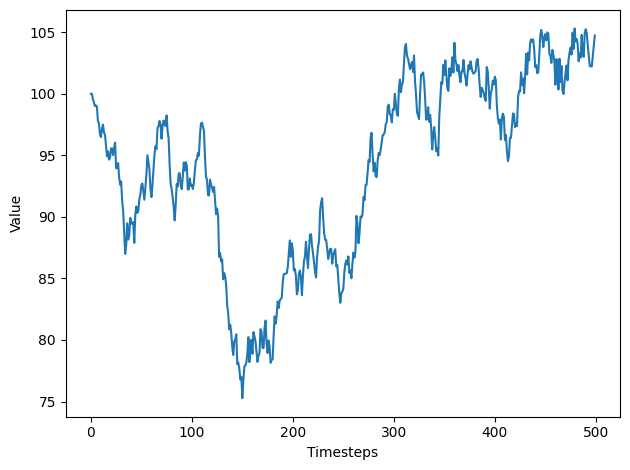

In [155]:
#ex3.5.1-2
fig, ax = plt.subplots()

ax.plot(random_walk)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()

In [156]:
#ex3.5.1-3
ADF_result = adfuller(random_walk) #定常かどうかADF検定で確認

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -1.269138578419024
p-value: 0.6431705647617791


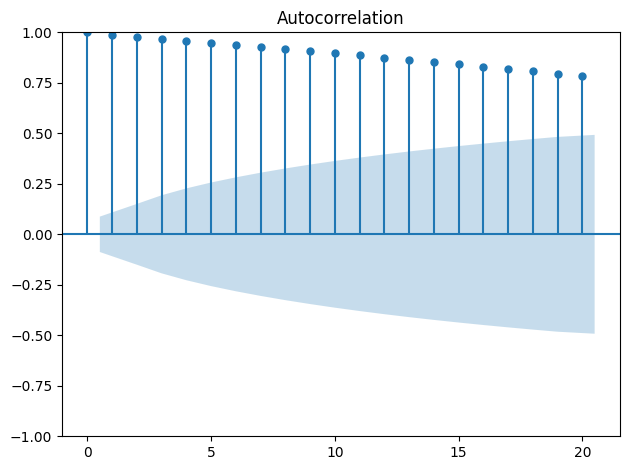

In [157]:
#ACFをプロット
plot_acf(random_walk, lags=20);

plt.tight_layout()

定常ではないと判断

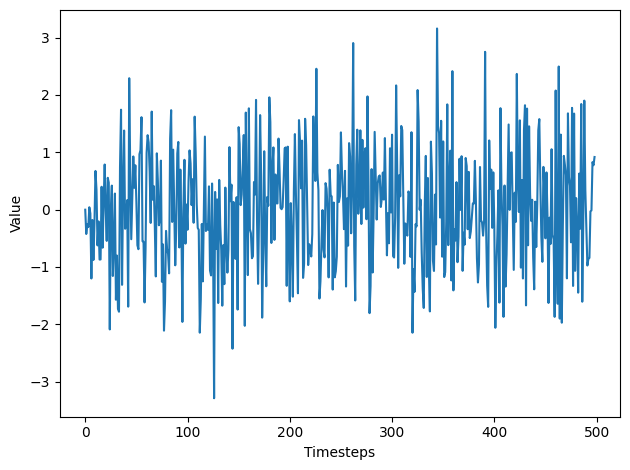

In [158]:
#ex3.5.1-4
#一次差分を取る
diff_random_walk = np.diff(random_walk)

#一次差分のプロット
fig, ax = plt.subplots()
ax.plot(diff_random_walk)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
plt.tight_layout()

In [159]:
#ex3.5.1-5
#ADF検定を実行
ADF_result_diff = adfuller(diff_random_walk)
print(f'ADF Statistic: {ADF_result_diff[0]}')
print(f'p-value: {ADF_result_diff[1]}')

ADF Statistic: -22.31753690453451
p-value: 0.0


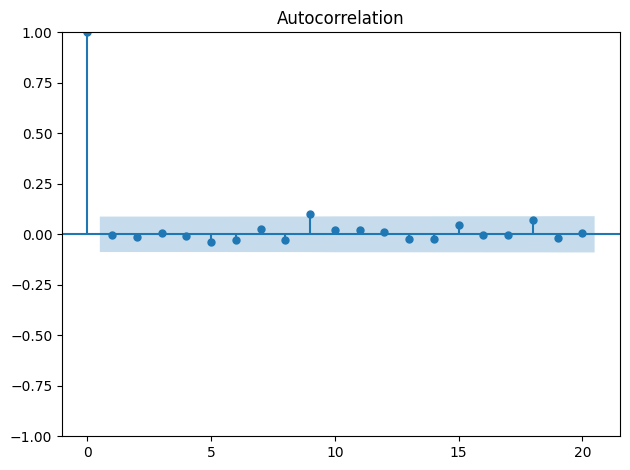

In [160]:
#ACFをプロット
plot_acf(diff_random_walk, lags=20);
plt.tight_layout()

In [161]:
#ex3.5.1-6
#train:test = 4:1で分割
df = pd.DataFrame(random_walk, columns=['value'])
train = df[:400]
test = df[400:]

In [162]:
#ex3.5.1-7
#単純な予測の適用
mean = train['value'].mean()
test.loc[:, 'pred_mean'] = mean #過去の平均による予測

last_value = train['value'].iloc[-1]
test.loc[:, 'pred_last'] = last_value #最後の値による予測

deltaX = len(train) - 1
deltay = last_value - train['value'].iloc[0]
drift = deltay / deltaX
x_vals = np.arange(len(train), n, 1)

pred_drift = drift * x_vals + train['value'].iloc[0]
test.loc[:, 'pred_drift'] = pred_drift #ドリフト法による予測

In [163]:
#MSEを計算
from sklearn.metrics import mean_squared_error
mse_mean = mean_squared_error(test['value'], test['pred_mean'])
mse_last = mean_squared_error(test['value'], test['pred_last'])
mse_drift = mean_squared_error(test['value'], test['pred_drift'])
print(f'MSE (mean): {mse_mean}')
print(f'MSE (last): {mse_last}')
print(f'MSE (drift): {mse_drift}')

MSE (mean): 98.4374325225203
MSE (last): 8.431391906742554
MSE (drift): 8.060026536114314


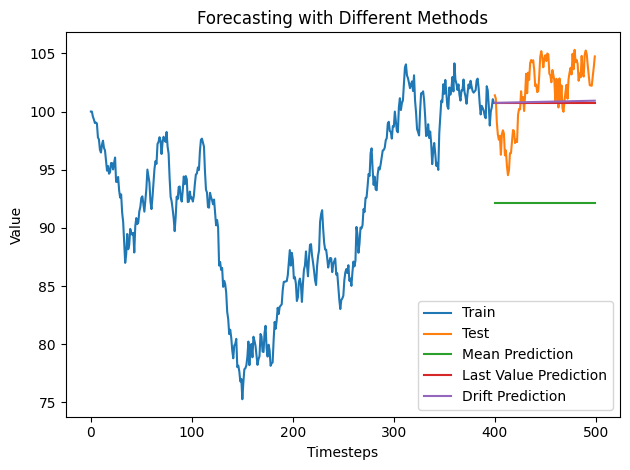

In [164]:
#ex3.5.1-8
#予測値をプロット
fig, ax = plt.subplots()
ax.plot(train['value'], label='Train')
ax.plot(test['value'], label='Test')
ax.plot(test['pred_mean'], label='Mean Prediction')
ax.plot(test['pred_last'], label='Last Value Prediction')
ax.plot(test['pred_drift'], label='Drift Prediction')
ax.legend()
plt.xlabel('Timesteps')
plt.ylabel('Value')
plt.title('Forecasting with Different Methods')
plt.tight_layout()

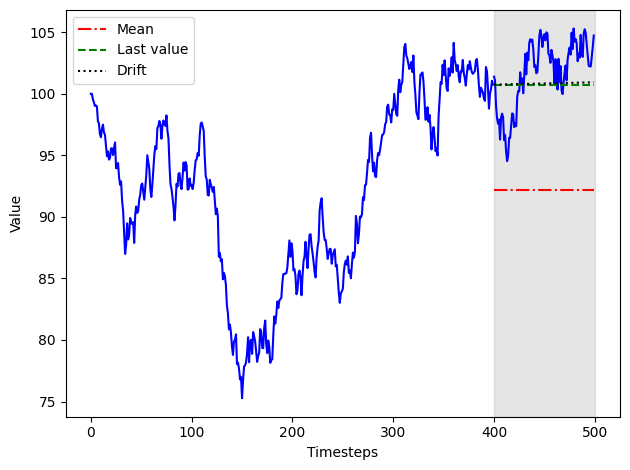

In [165]:
fig, ax = plt.subplots()

ax.plot(train.value, 'b-')
ax.plot(test['value'], 'b-')
ax.plot(test['pred_mean'], 'r-.', label='Mean')
ax.plot(test['pred_last'], 'g--', label='Last value')
ax.plot(test['pred_drift'], 'k:', label='Drift')

ax.axvspan(400, 500, color='#808080', alpha=0.2)
ax.legend(loc=2)

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()
plt.savefig('figures/CH03_F15_peixeiro.png', dpi=300)

In [166]:
#ex3.5.1-9
#次のタイムステップを予測するモデル
df_shift = df.shift(1)

df_shift.head()

,value
0,NaN
1,100.000000
2,99.997879
3,99.571987
4,99.316396


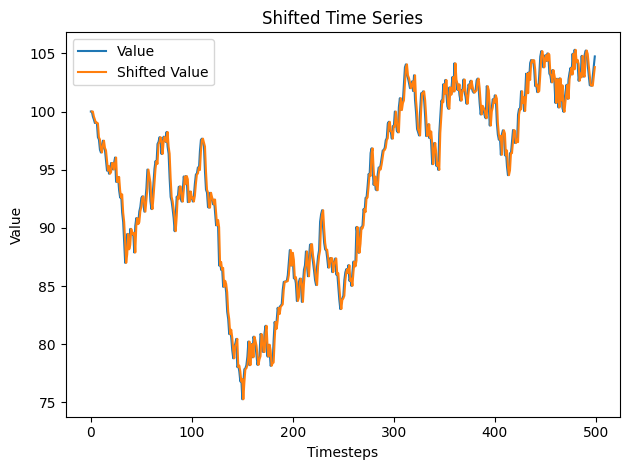

In [167]:
#ex3.5.1-10
#プロット
fig, ax = plt.subplots()
ax.plot(df['value'], label='Value')
ax.plot(df_shift['value'], label='Shifted Value')
ax.legend()
plt.xlabel('Timesteps')
plt.ylabel('Value')
plt.title('Shifted Time Series')
plt.tight_layout()

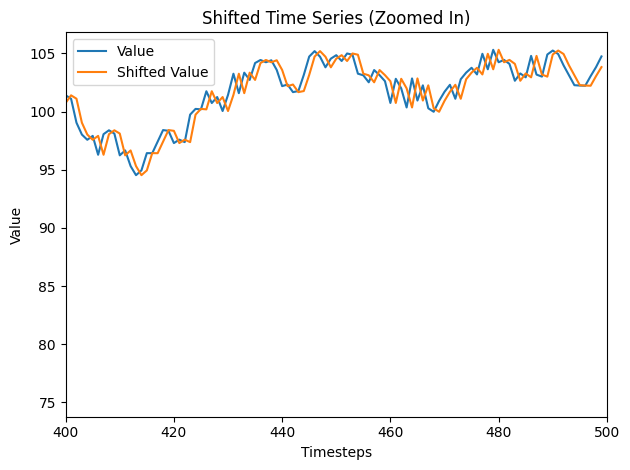

In [168]:
#400〜500のところだけを拡大
fig, ax = plt.subplots()
ax.plot(df['value'], label='Value')
ax.plot(df_shift['value'], label='Shifted Value')
ax.legend()
plt.xlim(400, 500)
plt.xlabel('Timesteps')
plt.ylabel('Value')
plt.title('Shifted Time Series (Zoomed In)')
plt.tight_layout()

In [169]:
#3.5.2-1
df_googl  = pd.read_csv('../data/GOOGL.csv')
df_googl

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-27,1292.000000,1294.099976,1265.060059,1270.859985,1270.859985,2209300
1,2020-04-28,1283.199951,1284.760010,1230.380005,1232.589966,1232.589966,4035000
2,2020-04-29,1345.000000,1360.150024,1326.729980,1342.180054,1342.180054,5417900
3,2020-04-30,1331.359985,1350.000000,1321.500000,1346.699951,1346.699951,2792100
4,2020-05-01,1324.089966,1351.430054,1309.660034,1317.319946,1317.319946,2443600
...,...,...,...,...,...,...,...
248,2021-04-21,2272.050049,2280.000000,2244.820068,2278.350098,2278.350098,1160200
249,2021-04-22,2275.399902,2288.879883,2240.320068,2252.520020,2252.520020,1207300
250,2021-04-23,2267.000000,2306.120117,2261.250000,2299.929932,2299.929932,1453300
251,2021-04-26,2304.520020,2324.530029,2297.320068,2309.929932,2309.929932,1595200


In [170]:
train = df_googl[:248]
test = df_googl[248:]

In [171]:
#ex3.5.2-2
#単純な予測の適用
mean = train['Close'].mean()
test.loc[:, 'pred_mean'] = mean #過去の平均による予測

last_value = train['Close'].iloc[-1]
test.loc[:, 'pred_last'] = last_value #最後の値による予測

deltaX = len(train) - 1
deltay = last_value - train['Close'].iloc[0]
drift = deltay / deltaX
x_vals = np.arange(len(train), len(test) + len(train), 1)
pred_drift = drift * x_vals + train['Close'].iloc[0]
test.loc[:, 'pred_drift'] = pred_drift #ドリフト法による予測

#MSEを計算
from sklearn.metrics import mean_squared_error
mse_mean = mean_squared_error(test['Close'], test['pred_mean'])
mse_last = mean_squared_error(test['Close'], test['pred_last'])
mse_drift = mean_squared_error(test['Close'], test['pred_drift'])
print(f'MSE (mean): {mse_mean}')
print(f'MSE (last): {mse_last}')
print(f'MSE (drift): {mse_drift}')

MSE (mean): 356025.96701539395
MSE (last): 447.82398976418415
MSE (drift): 316.5506310959176


In [172]:
print(drift)
print(x_vals)
print(train['Close'].iloc[0])
print(pred_drift)

4.081579048582996
[248 249 250 251 252]
1270.859985
[2283.09158905 2287.1731681  2291.25474715 2295.33632619 2299.41790524]


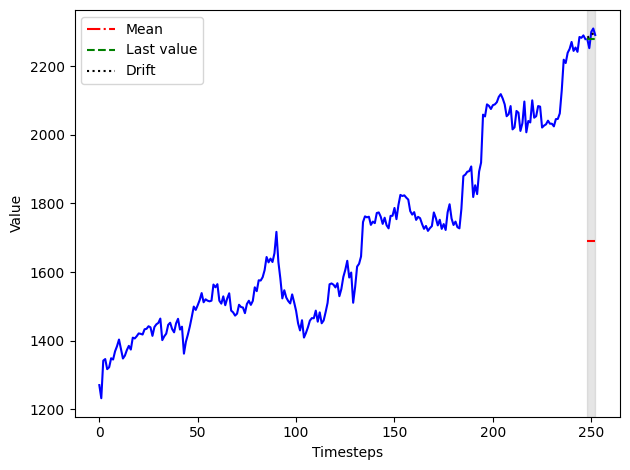

In [173]:
#ex3.5.2-3
#予測値をプロット
fig, ax = plt.subplots()
ax.plot(train['Close'], 'b-')
ax.plot(test['Close'], 'b-')
ax.plot(test['pred_mean'], 'r-.', label='Mean')
ax.plot(test['pred_last'], 'g--', label='Last value')
ax.plot(test['pred_drift'], 'k:', label='Drift')
ax.axvspan(248, 252, color='#808080', alpha=0.2)
ax.legend(loc=2)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
plt.tight_layout()

In [174]:
#ex3.5.2-4
#次のタイムステップを予測するモデル(終値のみ)
df_googl_shift = df_googl['Close'].shift(1)
df_googl_shift.head()

0            NaN
1    1270.859985
2    1232.589966
3    1342.180054
4    1346.699951
Name: Close, dtype: float64

In [175]:
#MSEを計算
mse_shift = mean_squared_error(test['Close'], df_googl_shift[248:])
print(f'MSE (shift): {mse_shift}')

MSE (shift): 674.8857699967758


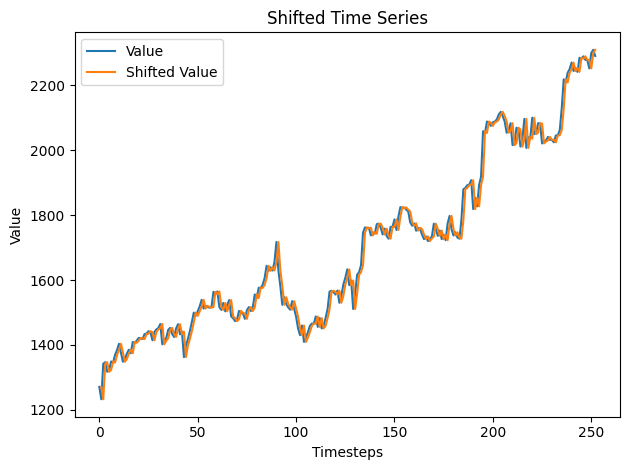

In [176]:
#ex3.5.2-5
#プロット
fig, ax = plt.subplots()
ax.plot(df_googl['Close'], label='Value')
ax.plot(df_googl_shift, label='Shifted Value')
ax.legend()
plt.xlabel('Timesteps')
plt.ylabel('Value')
plt.title('Shifted Time Series')
plt.tight_layout()

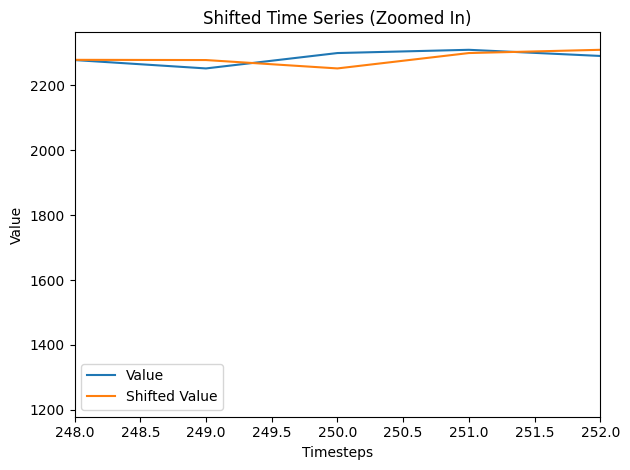

In [177]:
#testの5日間のデータを拡大
fig, ax = plt.subplots()
ax.plot(df_googl['Close'], label='Value')
ax.plot(df_googl_shift, label='Shifted Value')
ax.legend()
plt.xlim(248, 252)
plt.xlabel('Timesteps')
plt.ylabel('Value')
plt.title('Shifted Time Series (Zoomed In)')
plt.tight_layout()

In [30]:
#ex3.5.3-1
#株価のデータをYahoo financeから取得
import yfinance as yf

#取得したい銘柄のティッカーシンボル(例：APPL = Apple Inc.)
ticker = 'MSFT'

#データの取得(一年分のデータを取得)
data = yf.download(ticker, start='2022-01-01', end='2023-01-01')
data = pd.DataFrame(data)
#データの確認
data.head()


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2022-01-03,325.634796,328.796299,320.800127,326.218464,28865100
2022-01-04,320.051117,326.072567,317.239797,325.712617,32674300
2022-01-05,307.764984,317.191128,307.375882,316.986825,40054300
2022-01-06,305.333099,310.021859,303.008164,304.622966,39646100
2022-01-07,305.488708,307.881714,301.646255,305.595699,32720000


In [31]:
#取得したデータフレームの'Ticker'列を削除し、'Date'列をインデックスにして.csvファイルに保存
data = data.reset_index()
#data = data.drop(columns=['Ticker'])
data.to_csv('MSFT.csv', index=False)
data.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,MSFT,MSFT,MSFT,MSFT,MSFT
0,2022-01-03,325.634796,328.796299,320.800127,326.218464,28865100
1,2022-01-04,320.051117,326.072567,317.239797,325.712617,32674300
2,2022-01-05,307.764984,317.191128,307.375882,316.986825,40054300
3,2022-01-06,305.333099,310.021859,303.008164,304.622966,39646100
4,2022-01-07,305.488708,307.881714,301.646255,305.595699,32720000


In [32]:
df_MSFT  = pd.read_csv('MSFT.csv')
df_MSFT.head()

,Date,Close,High,Low,Open,Volume
0,NaN,MSFT,MSFT,MSFT,MSFT,MSFT
1,2022-01-03,325.6347961425781,328.79629901774877,320.80012748139205,326.21846414915797,28865100
2,2022-01-04,320.0511169433594,326.07256655416444,317.239796956852,325.7126166614886,32674300
3,2022-01-05,307.7649841308594,317.19112801347296,307.37588205960316,316.9868249346307,40054300
4,2022-01-06,305.3330993652344,310.0218586119927,303.0081644576789,304.62296646871727,39646100


In [36]:
data = df_MSFT

In [37]:
len(data)

252

In [38]:
#dataの欠損値などを確認
data.info()
data.describe()
data.isnull().sum()
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    251 non-null    object
 1   Close   252 non-null    object
 2   High    252 non-null    object
 3   Low     252 non-null    object
 4   Open    252 non-null    object
 5   Volume  252 non-null    object
dtypes: object(6)
memory usage: 11.9+ KB


Date      1
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

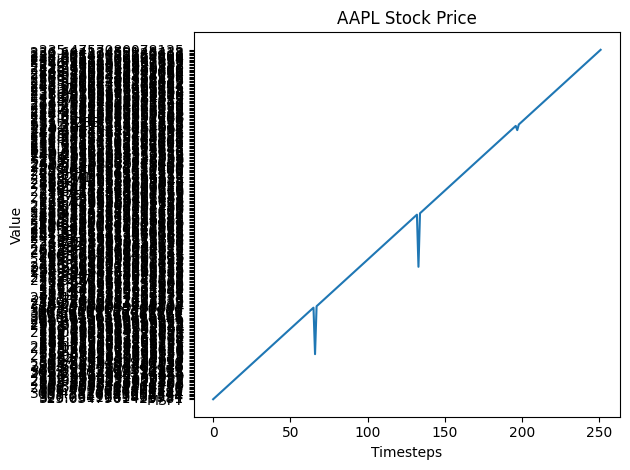

In [39]:
#plot
fig, ax = plt.subplots()
ax.plot(data['Close'])
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
plt.title('AAPL Stock Price')
plt.tight_layout()

In [40]:
#ex3.5.3-2
#ランダムウォークかの確認
#ADF検定
ADF_result = adfuller(data['Close'])
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ValueError: could not convert string to float: 'MSFT'

ValueError: could not convert string to float: 'MSFT'

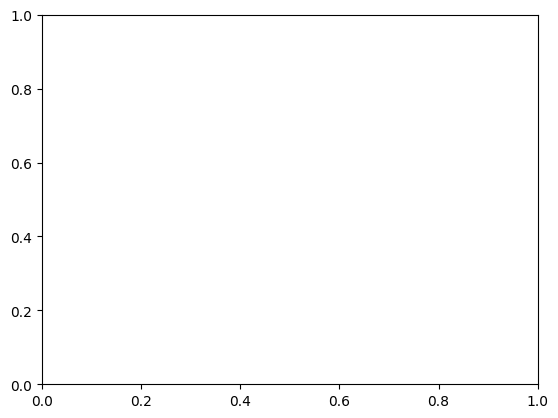

In [41]:
#ACFをプロット
plot_acf(data['Close'], lags=20);
plt.tight_layout()

おそらく定常ではない

In [184]:
#ex3.5.3-4
#最後の5日分をテストデータとして分割(終値のみ)
train = data[:246]
test = data[246:]

print(train.head())
print(test.head())
print(f'Train size: {len(train)}')
print(f'Test size: {len(test)}')

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2022-01-03  178.879913  179.734962  174.653874  174.771805  104487900
2022-01-04  176.609634  179.793920  176.039607  179.489254   99310400
2022-01-05  171.911850  177.071564  171.636666  176.521197   94537600
2022-01-06  169.042038  172.285289  168.688228  169.729997   96904000
2022-01-07  169.209137  171.145259  168.088742  169.916756   86709100
Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2022-12-23  130.344482  130.898044  128.149997  129.415284  63814900
2022-12-27  128.535522  129.899667  127.240581  129.870013  69007800
2022-12-28  124.591377  129.524023  124.423333  128.179654  85438400
2022-12-29  128.120346  12

In [185]:
#ex3.5.3-5
#単純な予測の適用
mean = train['Close'].mean().values[0] #過去の平均による予測
test.loc[:, 'pred_mean'] = mean

last_value = train['Close'].iloc[-1].values[0]
test.loc[:, 'pred_last'] = last_value #最後の値による予測

deltaX = len(train) - 1
deltay = last_value - train['Close'].iloc[0]
drift = deltay / deltaX
drift = drift.values[0]
a = train['Close'].iloc[0].values[0]
x_vals = np.arange(len(train), len(test) + len(train), 1)

In [186]:
pred_drift = drift * x_vals + a
test.loc[:, 'pred_drift'] = pred_drift #ドリフト法による予測

#MSEを計算
from sklearn.metrics import mean_squared_error
mse_mean = mean_squared_error(test['Close'], test['pred_mean'])
mse_last = mean_squared_error(test['Close'], test['pred_last'])
mse_drift = mean_squared_error(test['Close'], test['pred_drift'])
print(f'MSE (mean): {mse_mean}')
print(f'MSE (last): {mse_last}')
print(f'MSE (drift): {mse_drift}')

MSE (mean): 633.6275801160301
MSE (last): 10.835967507318127
MSE (drift): 7.73799519845163


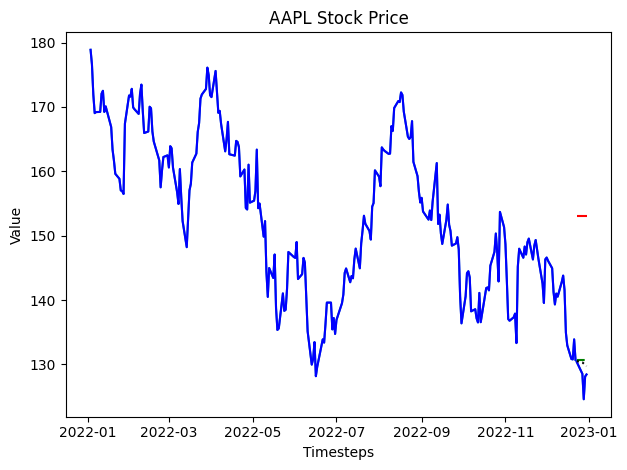

In [ ]:
#ex3.5.3-6
#予測値をプロット
fig, ax = plt.subplots()
ax.plot(data['Close'])
ax.plot(train['Close'], 'b-')
ax.plot(test['Close'], 'b-')
ax.plot(test['pred_mean'], 'r-.', label='Mean')
ax.plot(test['pred_last'], 'g--', label='Last value')
ax.plot(test['pred_drift'], 'k:', label='Drift')
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
plt.title('AAPL Stock Price')
plt.tight_layout()

In [188]:
#ex3.5.3-7
#次のタイムステップを予測するモデル(終値のみ)
df_googl_shift = data['Close'].shift(1)
df_googl_shift.head()
#MSEを計算
mse_shift = mean_squared_error(test['Close'], df_googl_shift[246:])
print(f'MSE (shift): {mse_shift}')

MSE (shift): 6.303211519843899


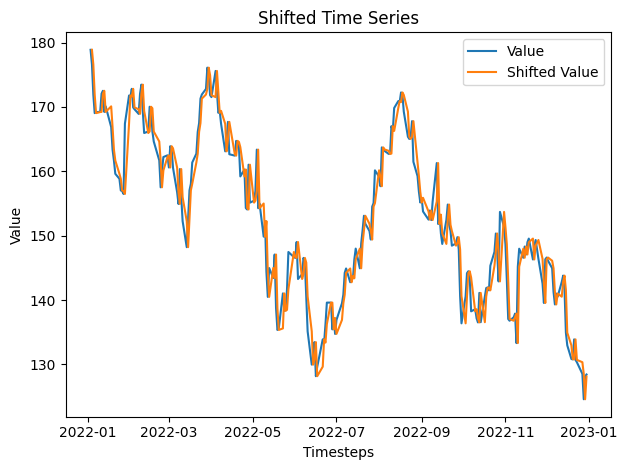

In [189]:
#ex3.5.3-8
#プロット
fig, ax = plt.subplots()
ax.plot(data['Close'], label='Value')
ax.plot(df_googl_shift, label='Shifted Value')
ax.legend()
plt.xlabel('Timesteps')
plt.ylabel('Value')
plt.title('Shifted Time Series')
plt.tight_layout()